In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000437
2017-03-17,-0.004823
2017-03-20,0.002415
2017-03-21,-0.000329


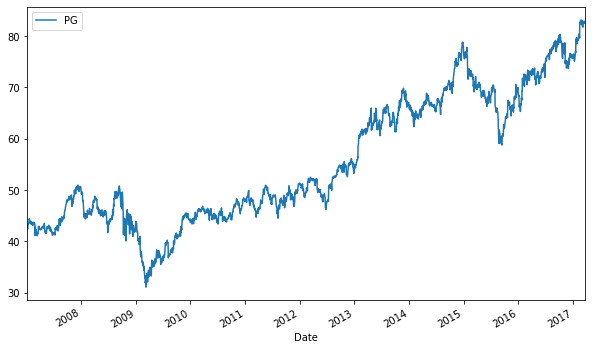

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.17655045])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[ 82.69041443,  82.69041443,  82.69041443, ...,  82.69041443,
         82.69041443,  82.69041443],
       [ 83.90832472,  82.37151802,  83.42677568, ...,  83.4301195 ,
         81.65727054,  82.8505001 ],
       [ 83.13324051,  82.29278655,  82.743545  , ...,  82.4347372 ,
         81.87696673,  82.45246998],
       ...,
       [ 77.36354768, 116.87632128, 101.27414811, ...,  84.25455287,
         67.09722859,  76.97447038],
       [ 78.47388245, 115.73835786, 104.86573048, ...,  85.14400714,
         66.62390628,  79.10959377],
       [ 78.62282655, 118.79761386, 103.10908456, ...,  86.07615392,
         66.65855661,  78.0218156 ]])

In [13]:
S.shape

(251, 10000)

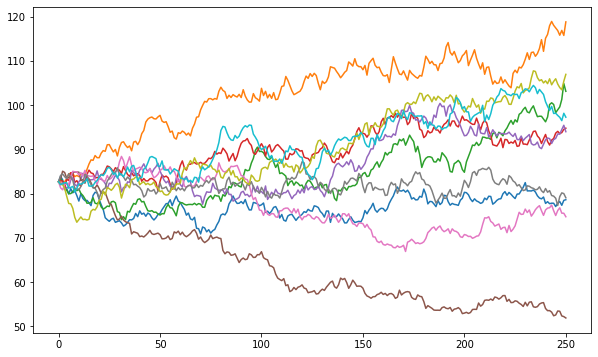

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [19]:
p = np.maximum(S[-1] - 110, 0)

In [20]:
p

array([0.        , 8.79761386, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [21]:
p.shape

(10000,)

In [22]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.4709620645213902